# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm_notebook
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


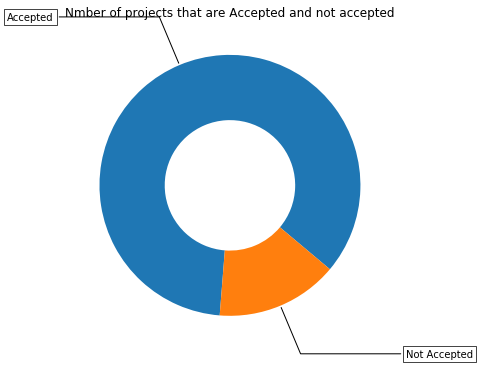

In [5]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

# Return the number of each classes present in train_data
y_value_counts = project_data['project_is_approved'].value_counts()

# Converting count into percentage with overall train_data
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

### 1.2.1 Univariate Analysis: School State

In [6]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']
temp.head()
# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

# scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#             [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# data = [ dict(
#         type='choropleth',
#         colorscale = scl,
#         autocolorscale = False,
#         locations = temp['state_code'],
#         z = temp['num_proposals'].astype(float),
#         locationmode = 'USA-states',
#         text = temp['state_code'],
#         marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
#         colorbar = dict(title = "% of pro")
#     ) ]

# layout = dict(
#         title = 'Project Proposals % of Acceptance Rate by US States',
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
#             showlakes = True,
#             lakecolor = 'rgb(255, 255, 255)',
#         ),
#     )

# fig = go.Figure(data=data, layout=layout)
# offline.iplot(fig, filename='us-map-heat-map')

state_code  num_proposals
0         AK       0.840580
1         AL       0.854711
2         AR       0.831268
3         AZ       0.838379
4         CA       0.858136

In [7]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [8]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [9]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

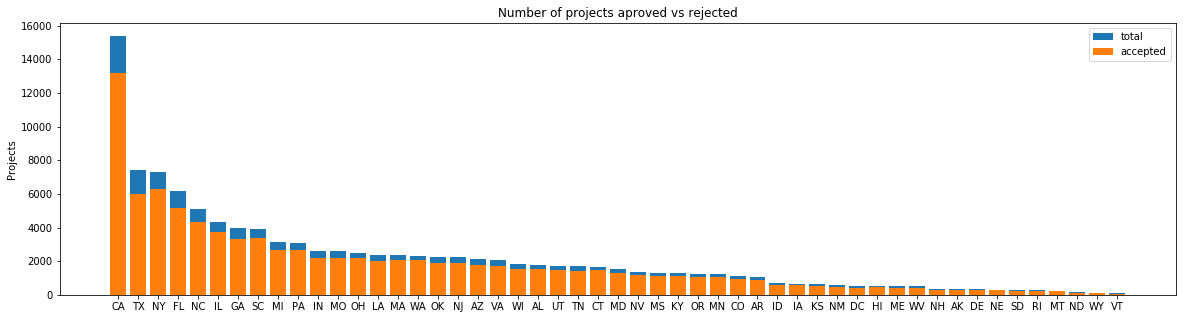

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [10]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

## Observation
- Every state has greater than 80% success rate in approval
- CA have done more proposal projects than the others. Also we observed from that eventhough they had done many projects, 85% of projects as been approved by this state.
- VT state had done only 80 projects (lowest number of projects) and out of these 64 has been appreoved.

### 1.2.2 Univariate Analysis: teacher_prefix

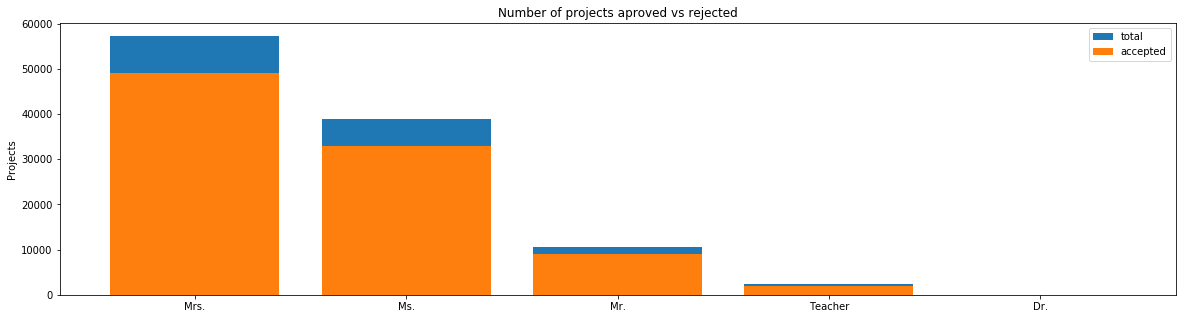

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [11]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

## Observation
- People's (Other than teacher and Dr.) project is approved above 84% and also done above 10K projects.
- Teacher with prefix (Mrs and Ms) had done more around around in the 10K number of project than the other with less than 10K projects.

### 1.2.3 Univariate Analysis: project_grade_category

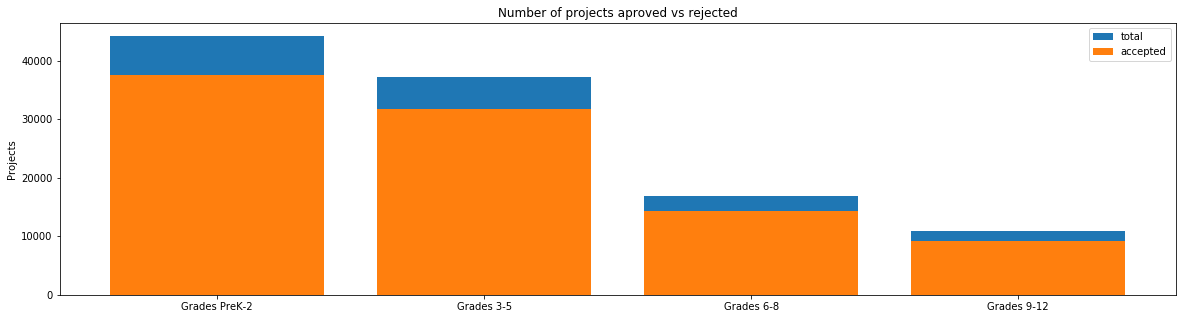

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [12]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

__Summary : These all project_grade_category had equivalent(more or less) project's approved 83% and also done above 10K projects.__

### 1.2.4 Univariate Analysis: project_subject_categories

In [13]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [14]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

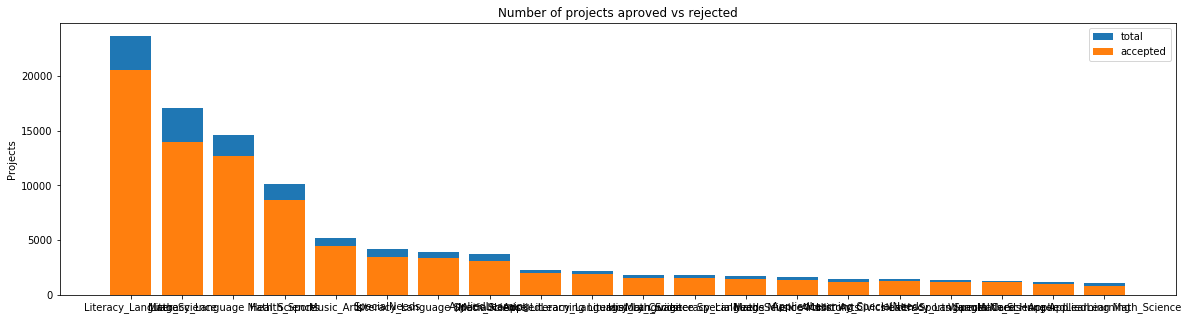

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [15]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [16]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

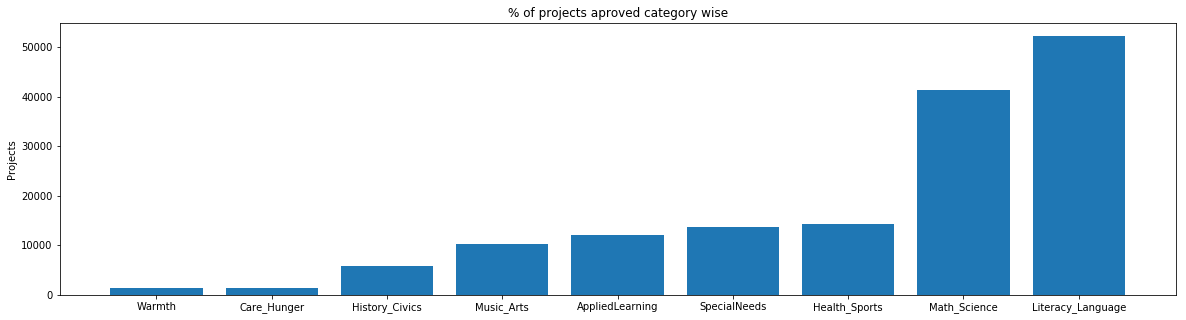

In [17]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [18]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


__Summary : We found that Literacy_language and Math_Science categories are trending fields that people are focus the most projects__

### 1.2.5 Univariate Analysis: project_subject_subcategories

In [19]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [20]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

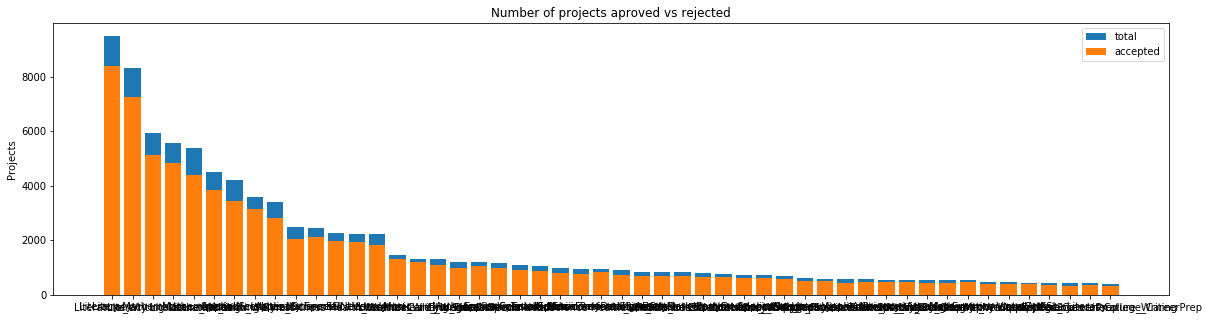

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [21]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [22]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

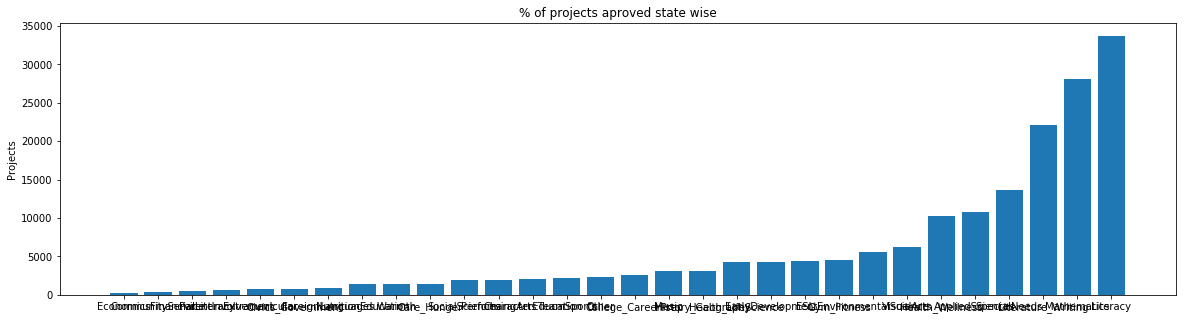

In [23]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [24]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


> Summary : As we already seen Literacy_language and Math_Science categories have the most trending field where people are most considerate on this field to make project
>> Literacy is the sub-category of Literacty_language and Mathematics is the sub-category of Math_Science which have most trending as we observed from previous point (which has to be expected)

### 1.2.6 Univariate Analysis: Text features (Title)

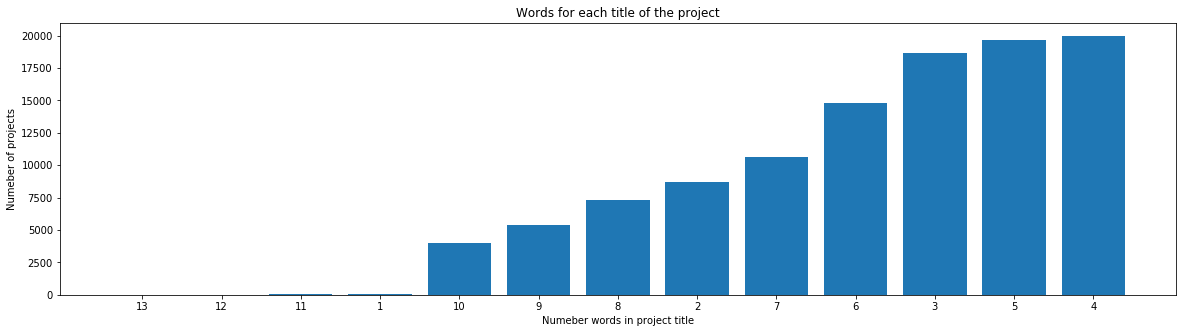

In [25]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [26]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

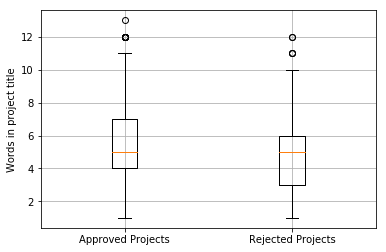

In [27]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

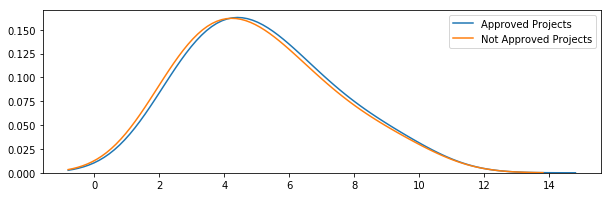

In [28]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

__Summary : We observed that for the project title which 4 tends to have more density however, we cannot find the differentation of project's approval (Approved and not approved projects). So, we can't get any information from this.__

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [29]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [30]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

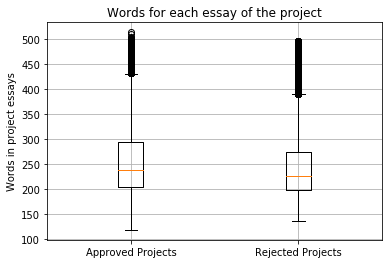

In [31]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

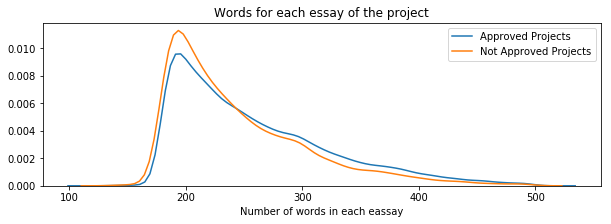

In [32]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

__Summary : We observed that most of the essay which have 200 words have more density than the others for both approved and not approved project and approved project have more at the peak and not approved project have more for 200 words later. We cannot find any information helpful for further processing__

### 1.2.8 Univariate Analysis: Cost per project

In [33]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [34]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [35]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [36]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

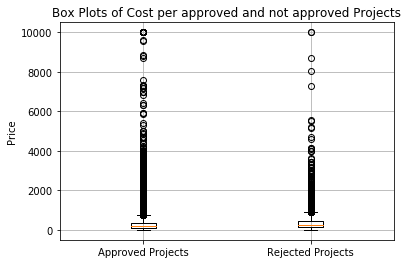

In [37]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

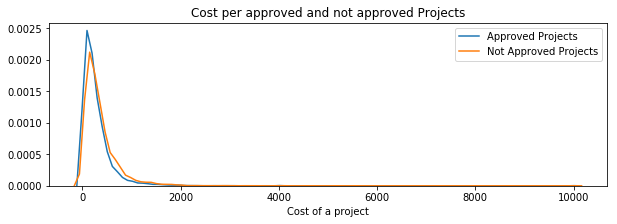

In [38]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [39]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

## Observation
- From the plot graph, we can say for sure that most people are spending on projects about less than 1000 cost price.
- From the percentile table, if we observed on 95th percentile, the cost project (for which the project is rejected) has gotten more costlier than the approved project's ones (which is 124% times of approved ones). Not only that 95% percentile, other less than 95% percentile, rejected project's ones had gotten more expense than the approved ones.

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

In [40]:
prev_proj_approved = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values
prev_proj_reject = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values

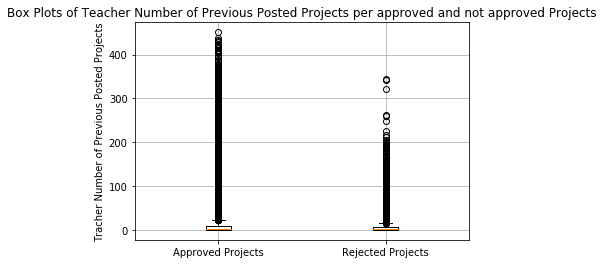

In [41]:
plt.boxplot([prev_proj_approved, prev_proj_reject])
plt.title('Box Plots of Teacher Number of Previous Posted Projects per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Tracher Number of Previous Posted Projects')
plt.grid()
plt.show()

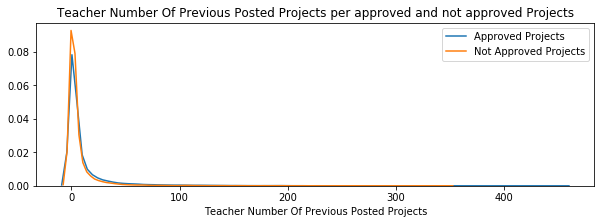

In [42]:
plt.figure(figsize=(10,3))
sns.distplot(prev_proj_approved, hist=False, label="Approved Projects")
sns.distplot(prev_proj_reject, hist=False, label="Not Approved Projects")
plt.title('Teacher Number Of Previous Posted Projects per approved and not approved Projects')
plt.xlabel('Teacher Number Of Previous Posted Projects')
plt.legend()
plt.show()

In [43]:
x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(prev_proj_approved,i), 3), np.round(np.percentile(prev_proj_reject,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.0        |          0.0          |
|     5      |        0.0        |          0.0          |
|     10     |        0.0        |          0.0          |
|     15     |        0.0        |          0.0          |
|     20     |        0.0        |          0.0          |
|     25     |        0.0        |          0.0          |
|     30     |        1.0        |          0.0          |
|     35     |        1.0        |          1.0          |
|     40     |        1.0        |          1.0          |
|     45     |        2.0        |          1.0          |
|     50     |        2.0        |          2.0          |
|     55     |        3.0        |          2.0          |
|     60     |        4.0        |          3.0          |
|     65     |        5.0        |          3.0         

## Observation
- From the plot graph, we observed that most of the teachers had posted maximum of 10 previously projects which should more dense in that area.
- From the percentile observation, if we observe 90th and 95th percentile, it showing more gaps about 20-30 projects but from that 95th to 100th percentile, there is huge variation gap between them (300-400)

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

In [44]:
summary_text = project_data[project_data['project_is_approved']==1]['project_resource_summary'].values
print('Total number of data row',summary_text.shape[0])

present_numeric = []
for i in summary_text:
    txt = i.split()
    for j in txt:
        if j.isnumeric():
            present_numeric.append(i)
            break
        else:
            continue
print('Number of data row that contain numeric value',len(present_numeric))
print('%age of data row that contain numeric value in all project approved {0}%'.format(summary_text.shape[0]/len(present_numeric)))

Total number of data row 92706
Number of data row that contain numeric value 10144
%age of data row that contain numeric value in all project approved 9.138998422712934%


In [45]:
summary_text = project_data[project_data['project_is_approved']==0]['project_resource_summary'].values
print('Total number of data row',summary_text.shape[0])

present_numeric = []
for i in summary_text:
    txt = i.split()
    for j in txt:
        if j.isnumeric():
            present_numeric.append(i)
            break
        else:
            continue
print('Number of data row that contain numeric value',len(present_numeric))
print('%age of data row that contain numeric value in all project not approved {0}%'.format(summary_text.shape[0]/len(present_numeric)))

Total number of data row 16542
Number of data row that contain numeric value 1093
%age of data row that contain numeric value in all project not approved 15.134492223238793%


## Observation
1. A list of text, which is approved project only, has got 9% that contain numeric value.
2. A list of text, which is not approved project only, has got 15% that contain numeric value

From the above points, we can say that there is no relation between numeric text to project approval which we can further process

In [46]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_resource_summary'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_resource_summary'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

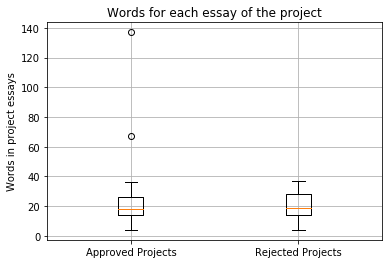

In [47]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

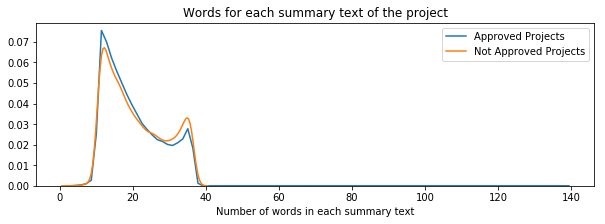

In [48]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each summary text of the project')
plt.xlabel('Number of words in each summary text')
plt.legend()
plt.show()

__Summary : We cant find any useful informatio in from this plot__

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [49]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price  quantity  
0  My students are English learners that are work...  154.6        23  
1  Our students arrive to our school eager to lea...  299.0         1

In [50]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [51]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [52]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [53]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [54]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [55]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [56]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:47<00:00, 2302.15it/s]


In [57]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [58]:
# update dataframe for clean essay and remove old essay
project_data['clean_essay'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  price  \
0             Literacy_Language                  ESL Literacy  154.6   
1  History_Civics Health_Sports  Civics_Government TeamSports  299.0   

   quantity                                        clean_essay  
0        23  my students english learners working english s...  
1         1  our students arrive school eager learn they po...

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [59]:
# similarly you can preprocess the titles also
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  price  \
0             Literacy_Language                  ESL Literacy  154.6   
1  History_Civics Health_Sports  Civics_Government TeamSports  299.0   

   quantity                                        clean_essay  
0        23  my students english learners working english s...  
1         1  our students arrive school eager learn they po...

In [60]:
# 
preprocessed_title = []
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    # Replacing \r, \, \n into space
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    # Removing special characters other than A-Z a-z and 0-9
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 51397.77it/s]


In [61]:
# Updating dataframe for clean project title and remove old project title
project_data['clean_project_title'] = preprocessed_title
project_data.drop(['project_title'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  price  \
0             Literacy_Language                  ESL Literacy  154.6   
1  History_Civics Health_Sports  Civics_Government TeamSports  299.0   

   quantity                                        clean_essay  \
0        23  my students english learners working english s...   
1         1  our students arrive school eager learn they po...   

                         clean_project_title  
0  educational support english learners home  
1           wanted projector hungry learners

### 1.3.3 Project Resource Summary

In [62]:
# 
preprocessed_project_resource_summary = []
for sentance in tqdm(project_data['project_resource_summary'].values):
    sent = decontracted(sentance)
    # Removing special characters other than A-Z a-z and 0-9
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_resource_summary.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:04<00:00, 22386.39it/s]


In [63]:
# Updating dataframe for clean project resource summary and remove old project resource summary
project_data['clean_project_resource_summary'] = preprocessed_project_resource_summary
project_data.drop(['project_resource_summary'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4  teacher_number_of_previously_posted_projects  \
0             NaN                                             0   
1             NaN                                             7   

   project_is_approved              clean_categories  \
0                    0             Literacy_Language   
1                    1  History_Civics Health_Sports   

            clean_subcategories  price  quantity  \
0                  ESL Literacy  154.6        23   
1  Civics_Government TeamSports  299.0         1   

                                         clean_essay  \
0  my students english learners working english s...   
1  our students arrive school eager learn they po...   

                         clean_project_title  \
0  educational support english learners home   
1           wanted projector hungry learners   

                      clean_project_resource_summary  
0  my students need opportunities practice beginn...  
1  my students need projector help viewing educat...

## 1. 4 Preparing data for models

In [64]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'clean_categories', 'clean_subcategories',
       'price', 'quantity', 'clean_essay', 'clean_project_title',
       'clean_project_resource_summary'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data (clean)
       - text : text data (clean essay)
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [65]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [66]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [67]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
# One hot encoding for school state

# Count Vectorize with vocuabulary contains unique code of school state and we are doing boolen BoW
vectorizer = CountVectorizer(vocabulary=project_data['school_state'].unique(), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())


school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)

['IN', 'FL', 'AZ', 'KY', 'TX', 'CT', 'GA', 'SC', 'NC', 'CA', 'NY', 'OK', 'MA', 'NV', 'OH', 'PA', 'AL', 'LA', 'VA', 'AR', 'WA', 'WV', 'ID', 'TN', 'MS', 'CO', 'UT', 'IL', 'MI', 'HI', 'IA', 'RI', 'NJ', 'MO', 'DE', 'MN', 'ME', 'WY', 'ND', 'OR', 'AK', 'MD', 'WI', 'SD', 'NE', 'NM', 'DC', 'KS', 'MT', 'NH', 'VT']
Shape of matrix after one hot encodig  (109248, 51)


In [68]:
# One hot encoding for project_grade_category

# Count Vectorize with vocuabulary contains unique code of project_grade_category and we are doing boolen BoW
vectorizer = CountVectorizer(vocabulary=project_data['project_grade_category'].unique(), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())


project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

['Grades PreK-2', 'Grades 6-8', 'Grades 3-5', 'Grades 9-12']
Shape of matrix after one hot encodig  (109248, 4)


In [69]:
# One hot encoding for teacher_prefix

# Count Vectorize with vocuabulary contains unique code of teacher_prefix and we are doing boolen BoW
# Since some of the data is filled with nan. So we update the nan to 'None' as a string
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('None')
vectorizer = CountVectorizer(vocabulary=project_data['teacher_prefix'].unique(), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())


teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'None', 'Dr.']
Shape of matrix after one hot encodig  (109248, 6)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [70]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [71]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

# Already Preprocessed the project_title in text preprocessing steps

In [72]:
# Similarly you can vectorize for title also
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (109248, 3329)


<h4><font color='red'> 1.4.2.3 Bag of Words on `project_resource_summary`</font></h4>

In [73]:
# Similarly you can vectorize for project resource summary also
vectorizer = CountVectorizer(min_df=10)
pr_summary_bow = vectorizer.fit_transform(preprocessed_project_resource_summary)
print("Shape of matrix after one hot encodig ",pr_summary_bow.shape)

Shape of matrix after one hot encodig  (109248, 5804)


#### 1.4.2.3 TFIDF vectorizer

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [75]:
# Similarly you can vectorize for title also
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 3329)


<h4><font color='red'> 1.4.2.5 TFIDF Vectorizer on `project_resource_summary`</font></h4>

In [76]:
# Similarly you can vectorize for project resource summary also
vectorizer = TfidfVectorizer(min_df=10)
pr_summary_tfidf = vectorizer.fit_transform(preprocessed_project_resource_summary)
print("Shape of matrix after one hot encodig ",pr_summary_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 5804)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [77]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [78]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [79]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:24<00:00, 4432.31it/s]


109248
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [80]:
# Similarly you can vectorize for title also
avg_w2v_title = []; # the avg-w2v for each project title is stored in this list
for sentence in tqdm(preprocessed_title): # for each project title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the project title
    for word in sentence.split(): # for each word in a project title
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title.append(vector)

print(len(avg_w2v_title))
print(len(avg_w2v_title[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 87210.92it/s]


109248
300


<h4><font color='red'> 1.4.2.7 Using Pretrained Models: AVG W2V on `project_resource_summary`</font></h4>

In [81]:
# Similarly you can vectorize for project resource summary also
avg_w2v_summary = []; # the avg-w2v for each project resource summary is stored in this list
for sentence in tqdm(preprocessed_project_resource_summary): # for each project resource summary
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the project resource summary
    for word in sentence.split(): # for each word in a project resource summary
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_summary.append(vector)

print(len(avg_w2v_summary))
print(len(avg_w2v_summary[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 40019.68it/s]


109248
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [82]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [83]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:10<00:00, 572.77it/s]


109248
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [84]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [85]:
# Similarly you can vectorize for title also
# compute average word2vec for each project title.
tfidf_w2v_title = []; # the avg-w2v for each project title is stored in this list
for sentence in tqdm(preprocessed_title): # for each project title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the project title
    for word in sentence.split(): # for each word in a project title
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title.append(vector)

print(len(tfidf_w2v_title))
print(len(tfidf_w2v_title[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 40361.41it/s]


109248
300


<h4><font color='red'> 1.4.2.10 Using Pretrained Models: TFIDF weighted W2V on `project_resource_summary`</font></h4>

In [86]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_project_resource_summary)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [87]:
# Similarly you can vectorize for title also
# compute average word2vec for each project title.
tfidf_w2v_summary = []; # the avg-w2v for each project title is stored in this list
for sentence in tqdm(preprocessed_project_resource_summary): # for each project title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the project title
    for word in sentence.split(): # for each word in a project title
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_summary.append(vector)

print(len(tfidf_w2v_summary))
print(len(tfidf_w2v_summary[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:07<00:00, 13881.52it/s]


109248
300


### 1.4.3 Vectorizing Numerical features

## For price

In [88]:
# the cost feature is already in numerical values,  we are going to represent the money, as numerical values within the range 0-1
# normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_normalized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
price_normalized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [89]:
price_normalized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

## For teacher_number_of_previously_projects

In [90]:
# We are going to represent the teacher_number_of_previously_posted_projects, as numerical values within the range 0-1
# normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# teacher_number_of_previously_posted_projects_normalized = standardScalar.fit(project_data['teacher_number_of_previously_posted_projects'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
teacher_number_of_previously_posted_projects_normalized = teacher_number_of_previously_posted_projects_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.153165275336848, Standard deviation : 27.77702641477403


In [91]:
teacher_number_of_previously_posted_projects_normalized

array([[-0.40152481],
       [-0.14951799],
       [-0.36552384],
       ...,
       [-0.29352189],
       [-0.40152481],
       [-0.40152481]])

## For quantity

In [92]:
# We are going to represent the quantity, as numerical values within the range 0-1
# normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# quantity_normalized = standardScalar.fit(project_data['quantity'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(project_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
quantity_normalized = quantity_scalar.transform(project_data['quantity'].values.reshape(-1, 1))

Mean : 16.965610354422964, Standard deviation : 26.182821919093175


In [93]:
quantity_normalized

array([[ 0.23047132],
       [-0.60977424],
       [ 0.19227834],
       ...,
       [-0.4951953 ],
       [-0.03687954],
       [-0.45700232]])

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data (clean)
       - text : text data (clean essay)
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

In [94]:
from sklearn.manifold import TSNE
from scipy.sparse import hstack

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [95]:
# please write all of the code with proper documentation and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
print('.....Categorical attributes.....')
print('School State data shape',school_state_one_hot.shape)
print('Categories data shape',categories_one_hot.shape)
print('SubCategory data shape',sub_categories_one_hot.shape)
print('projecy_grade category shape',project_grade_category_one_hot.shape)
print('teacher_prefix data shape',teacher_prefix_one_hot.shape)
print('*'*60)
print('.....Text attributes.....')
# print(text_bow.shape)
print('project title Bow data shape',title_bow.shape)
print('project title TFIDF data shape',title_tfidf.shape)
print('avg weight project title data shape',np.array(avg_w2v_title).shape)
print('tfidf weight project title data shape',np.array(tfidf_w2v_title).shape)
# print(pr_summary_bow.shape)
print('*'*60)
print('.....Numerics attributes.....')
print('price data shape',price_normalized.shape)
print('teacher number of previously project posted',teacher_number_of_previously_posted_projects_normalized.shape)
print('quantity data shape',quantity_normalized.shape)

.....Categorical attributes.....
School State data shape (109248, 51)
Categories data shape (109248, 9)
SubCategory data shape (109248, 30)
projecy_grade category shape (109248, 4)
teacher_prefix data shape (109248, 6)
************************************************************
.....Text attributes.....
project title Bow data shape (109248, 3329)
project title TFIDF data shape (109248, 3329)
avg weight project title data shape (109248, 300)
tfidf weight project title data shape (109248, 300)
************************************************************
.....Numerics attributes.....
price data shape (109248, 1)
teacher number of previously project posted (109248, 1)
quantity data shape (109248, 1)


In [96]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, project_grade_category_one_hot, \
            title_bow, \
            price_normalized, teacher_number_of_previously_posted_projects_normalized, quantity_normalized))
X.shape

(109248, 3375)

In [97]:
# To convert sparse to dense array
X = X.toarray()
X.shape

(109248, 3375)

In [98]:
# Taking 6k data points only
X_s = X[:6000]
X_s.shape

(6000, 3375)

In [99]:
# Taking class value of 6k data points only
Y = project_data['project_is_approved'].values
Y.shape

(109248,)

In [100]:
Y_s = Y[:6000]
Y_s.shape

(6000,)

In [101]:
# Applying TSNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
X_embedded = TSNE(n_components=2).fit_transform(X_s)
X_embedded.shape

(6000, 2)

In [102]:
df_plot = pd.DataFrame(data=X_embedded, columns=['Dim_0','Dim_1'])
df_plot.head()

Dim_0      Dim_1
0 -43.575531 -15.316840
1  27.357765  54.058769
2  30.608727  51.953495
3  -5.845784 -48.235226
4  30.141809 -31.252855

In [103]:
df_plot['Label'] = Y_s
df_plot.head()

Dim_0      Dim_1  Label
0 -43.575531 -15.316840      0
1  27.357765  54.058769      1
2  30.608727  51.953495      0
3  -5.845784 -48.235226      1
4  30.141809 -31.252855      1

In [104]:
df_plot['Label'] = df_plot['Label'].replace({0: 'Not Approved', 1: 'Approved'})
df_plot.head()

Dim_0      Dim_1         Label
0 -43.575531 -15.316840  Not Approved
1  27.357765  54.058769      Approved
2  30.608727  51.953495  Not Approved
3  -5.845784 -48.235226      Approved
4  30.141809 -31.252855      Approved

Text(0.5, 1.0, 'T-SNE Plot (When project_title used BoW) and Perplexity = 30 (Rest Parameter are as default)')

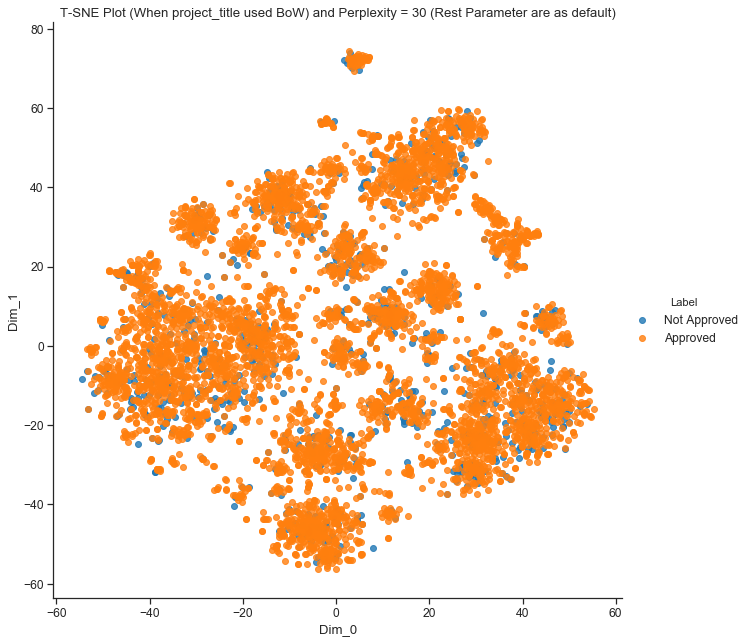

In [105]:
# Plot T-SNE: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x = 'Dim_0', y = 'Dim_1', data = df_plot, fit_reg=False, legend=True, size=9, hue='Label')
plt.title('T-SNE Plot (When project_title used BoW) and Perplexity = 30 (Rest Parameter are as default)')

In [106]:
X_embedded = TSNE(n_components=2, perplexity= 10).fit_transform(X_s)

In [107]:
X_embedded.shape

(6000, 2)

In [108]:
df_plot = pd.DataFrame(data=X_embedded, columns=['Dim_0','Dim_1'])
df_plot.head()

Dim_0      Dim_1
0  29.665512 -64.789413
1 -73.974831  28.903862
2 -70.387238  30.896889
3  73.401680  -0.216138
4  38.051998  32.656528

In [109]:
df_plot['Label'] = Y_s
df_plot['Label'] = df_plot['Label'].replace({0: 'Not Approved', 1: 'Approved'})
df_plot.head()

Dim_0      Dim_1         Label
0  29.665512 -64.789413  Not Approved
1 -73.974831  28.903862      Approved
2 -70.387238  30.896889  Not Approved
3  73.401680  -0.216138      Approved
4  38.051998  32.656528      Approved

Text(0.5, 1.0, 'T-SNE Plot (When project_title used BoW) and Perplexity = 10 (Rest Parameter are as default)')

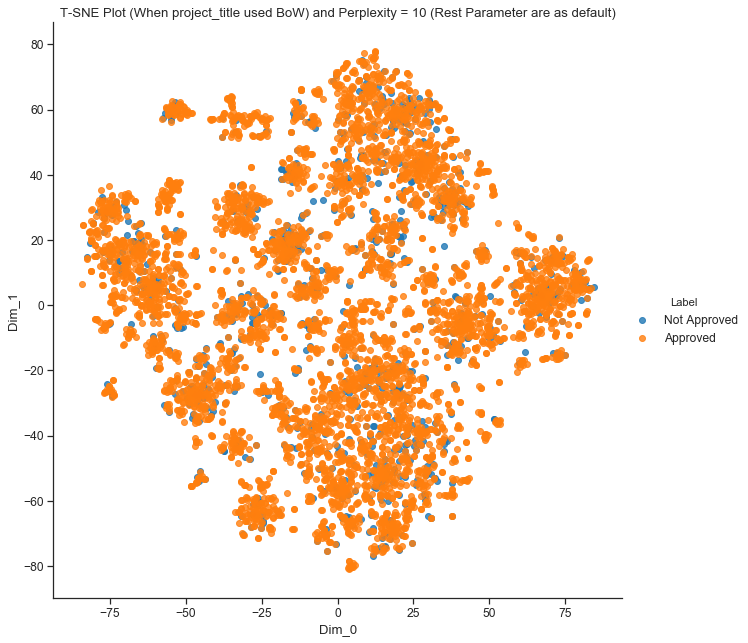

In [110]:
# Plot T-SNE: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x = 'Dim_0', y = 'Dim_1', data = df_plot, fit_reg=False, legend=True, size=9, hue='Label')
plt.title('T-SNE Plot (When project_title used BoW) and Perplexity = 10 (Rest Parameter are as default)')

In [111]:
X_embedded = TSNE(n_components=2, perplexity= 10, learning_rate=750).fit_transform(X_s)
X_embedded.shape

(6000, 2)

In [112]:
df_plot = pd.DataFrame(data=X_embedded, columns=['Dim_0','Dim_1'])
df_plot.head()

Dim_0      Dim_1
0  69.886604 -16.025370
1 -49.180511  60.098587
2 -43.683739  58.258110
3  10.146492 -78.909409
4 -45.115955 -47.382080

In [113]:
df_plot['Label'] = Y_s
df_plot['Label'] = df_plot['Label'].replace({0: 'Not Approved', 1: 'Approved'})
df_plot.head()

Dim_0      Dim_1         Label
0  69.886604 -16.025370  Not Approved
1 -49.180511  60.098587      Approved
2 -43.683739  58.258110  Not Approved
3  10.146492 -78.909409      Approved
4 -45.115955 -47.382080      Approved

Text(0.5, 1.0, 'T-SNE Plot (When project_title used BoW) and Perplexity = 10 and Learning Rate = 750 (Rest Parameter are as default)')

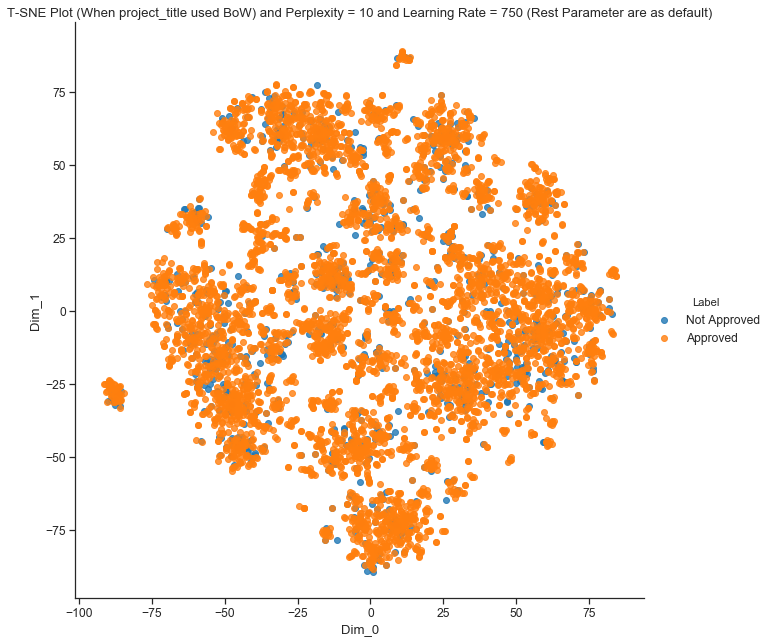

In [114]:
# Plot T-SNE: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x = 'Dim_0', y = 'Dim_1', data = df_plot, fit_reg=False, legend=True, size=9, hue='Label')
plt.title('T-SNE Plot (When project_title used BoW) and Perplexity = 10 and Learning Rate = 750 (Rest Parameter are as default)')

## Observation:
By using project_title as a BoW, we observed from the graph that there is no separation of cluster between them by changing perplexity and learning rate in above three graphs.

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

In [115]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, project_grade_category_one_hot, \
            title_tfidf, \
            price_normalized, teacher_number_of_previously_posted_projects_normalized, quantity_normalized))
X.shape    

(109248, 3375)

In [116]:
# To convert sparse to dense array
X = X.toarray()
X.shape

(109248, 3375)

In [117]:
# Taking 6k data points only
X_s = X[:6000]
X_s.shape

(6000, 3375)

In [118]:
# Applying TSNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
X_embedded = TSNE(n_components=2).fit_transform(X_s)
X_embedded.shape

(6000, 2)

In [119]:
df_plot = pd.DataFrame(data=X_embedded, columns=['Dim_0','Dim_1'])
df_plot.head()

Dim_0      Dim_1
0 -16.328360 -74.173912
1 -52.106667  28.615175
2 -70.634323   8.704515
3  39.542957 -39.484619
4  56.640121  -6.871465

In [120]:
df_plot['Label'] = Y_s
df_plot['Label'] = df_plot['Label'].replace({0: 'Not Approved', 1: 'Approved'})
df_plot.head()

Dim_0      Dim_1         Label
0 -16.328360 -74.173912  Not Approved
1 -52.106667  28.615175      Approved
2 -70.634323   8.704515  Not Approved
3  39.542957 -39.484619      Approved
4  56.640121  -6.871465      Approved

Text(0.5, 1.0, 'T-SNE Plot (When project_title used TIDF) and Perplexity = 30 (Rest Parameter are as default)')

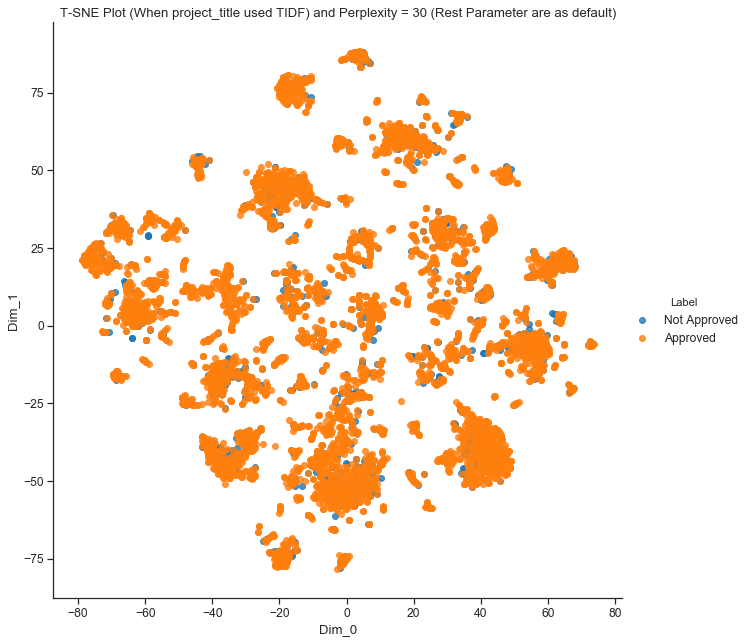

In [121]:
# Plot T-SNE: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x = 'Dim_0', y = 'Dim_1', data = df_plot, fit_reg=False, legend=True, size=9, hue='Label')
plt.title('T-SNE Plot (When project_title used TIDF) and Perplexity = 30 (Rest Parameter are as default)')

In [122]:
X_embedded = TSNE(n_components=2, perplexity= 10).fit_transform(X_s)
X_embedded.shape

(6000, 2)

In [123]:
df_plot = pd.DataFrame(data=X_embedded, columns=['Dim_0','Dim_1'])
df_plot.head()

Dim_0      Dim_1
0 -32.490196  72.885406
1 -85.426224 -22.961451
2 -87.044930  -8.580714
3  60.785446  38.720440
4  48.608006   7.805057

In [124]:
df_plot['Label'] = Y_s
df_plot['Label'] = df_plot['Label'].replace({0: 'Not Approved', 1: 'Approved'})
df_plot.head()

Dim_0      Dim_1         Label
0 -32.490196  72.885406  Not Approved
1 -85.426224 -22.961451      Approved
2 -87.044930  -8.580714  Not Approved
3  60.785446  38.720440      Approved
4  48.608006   7.805057      Approved

Text(0.5, 1.0, 'T-SNE Plot (When project_title used TFIDF) and Perplexity = 10 (Rest Parameter are as default)')

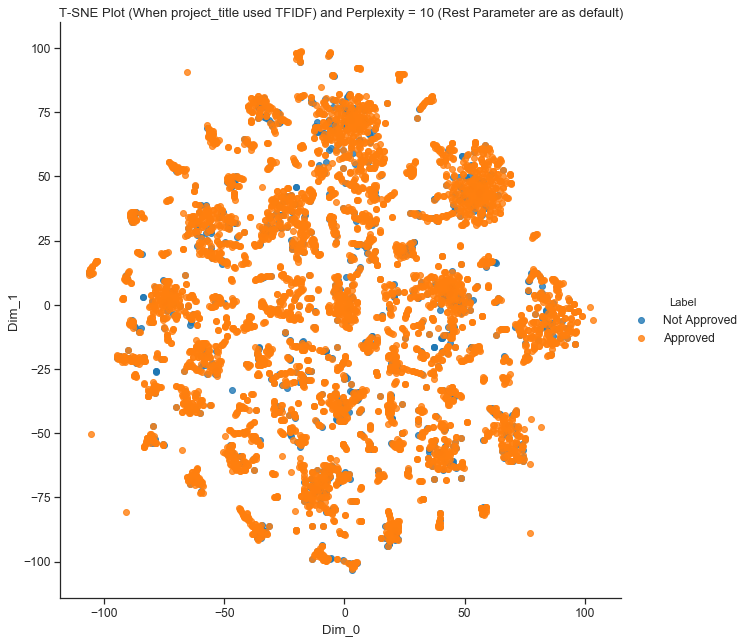

In [125]:
# Plot T-SNE: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x = 'Dim_0', y = 'Dim_1', data = df_plot, fit_reg=False, legend=True, size=9, hue='Label')
plt.title('T-SNE Plot (When project_title used TFIDF) and Perplexity = 10 (Rest Parameter are as default)')

In [126]:
X_embedded = TSNE(n_components=2, perplexity= 10, learning_rate=750).fit_transform(X_s)
X_embedded.shape

(6000, 2)

In [127]:
df_plot = pd.DataFrame(data=X_embedded, columns=['Dim_0','Dim_1'])
df_plot.head()

Dim_0      Dim_1
0 -30.092499  72.867645
1  38.655273 -56.753853
2  44.092979 -46.375217
3  56.586575  81.393333
4 -75.102043  36.755798

In [128]:
df_plot['Label'] = Y_s
df_plot['Label'] = df_plot['Label'].replace({0: 'Not Approved', 1: 'Approved'})
df_plot.head()

Dim_0      Dim_1         Label
0 -30.092499  72.867645  Not Approved
1  38.655273 -56.753853      Approved
2  44.092979 -46.375217  Not Approved
3  56.586575  81.393333      Approved
4 -75.102043  36.755798      Approved

Text(0.5, 1.0, 'T-SNE Plot (When project_title used TFIDF) and Perplexity = 10 and Learning Rate = 750 (Rest Parameter are as default)')

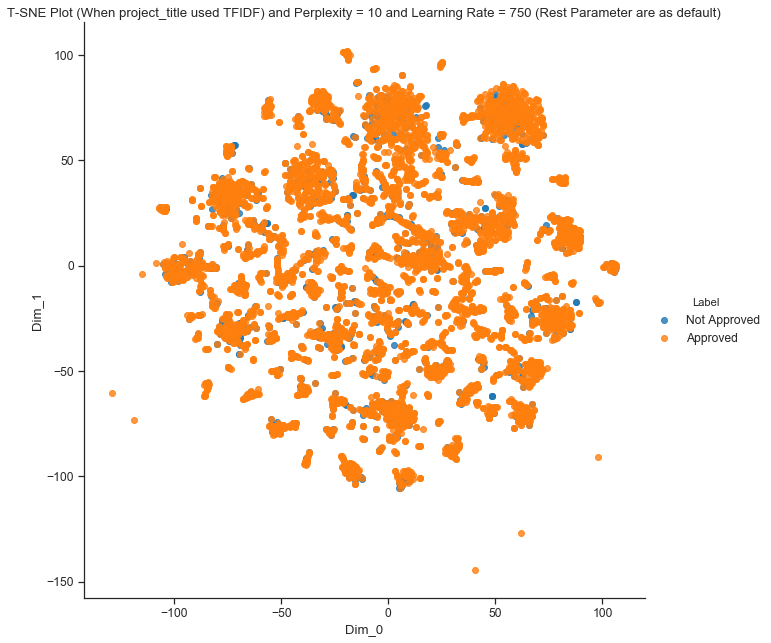

In [129]:
# Plot T-SNE: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x = 'Dim_0', y = 'Dim_1', data = df_plot, fit_reg=False, legend=True, size=9, hue='Label')
plt.title('T-SNE Plot (When project_title used TFIDF) and Perplexity = 10 and Learning Rate = 750 (Rest Parameter are as default)')

## Observation
From the above graph (while changing hyperparameter like learning rate and perplexity), it is well separated cluster than the BoW features but it still overlapping of two different classes. So we cant find usefulness for further processing

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

In [130]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
X = hstack((categories_one_hot, sub_categories_one_hot, project_grade_category_one_hot, \
            avg_w2v_title, \
            price_normalized, teacher_number_of_previously_posted_projects_normalized, quantity_normalized))
X.shape        

(109248, 346)

In [131]:
# To convert sparse to dense array
X = X.toarray()
X.shape

(109248, 346)

In [132]:
# Taking 6k data points only
X_s = X[:6000]
X_s.shape

(6000, 346)

In [133]:
# Applying TSNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
X_embedded = TSNE(n_components=2).fit_transform(X_s)
X_embedded.shape

(6000, 2)

In [134]:
df_plot = pd.DataFrame(data=X_embedded, columns=['Dim_0','Dim_1'])
df_plot.head()

Dim_0      Dim_1
0  33.192589  30.390368
1 -19.908981 -52.656906
2   4.593211 -74.119164
3 -17.891525  41.729424
4 -28.962248  28.248508

In [135]:
df_plot['Label'] = Y_s
df_plot['Label'] = df_plot['Label'].replace({0: 'Not Approved', 1: 'Approved'})
df_plot.head()

Dim_0      Dim_1         Label
0  33.192589  30.390368  Not Approved
1 -19.908981 -52.656906      Approved
2   4.593211 -74.119164  Not Approved
3 -17.891525  41.729424      Approved
4 -28.962248  28.248508      Approved

Text(0.5, 1.0, 'T-SNE Plot (When project_title used AVG W2V) and Perplexity = 30 (Rest Parameter are as default)')

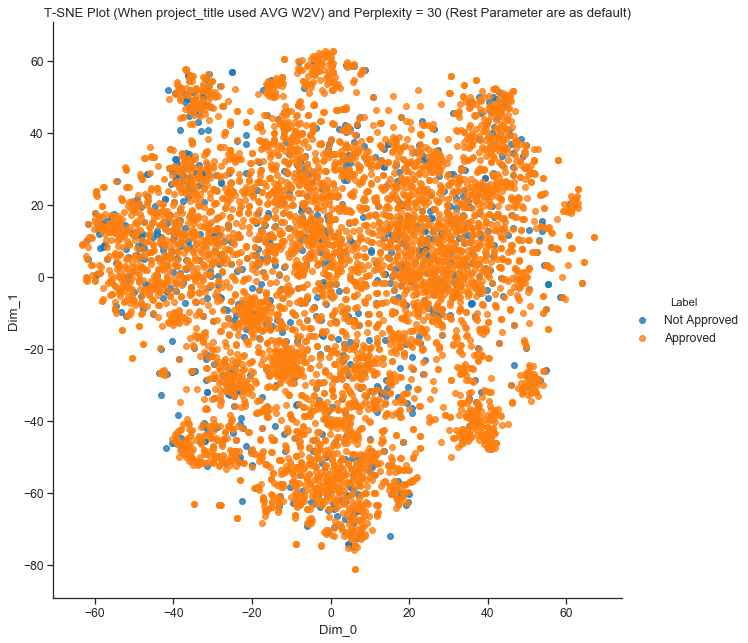

In [136]:
# Plot T-SNE: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x = 'Dim_0', y = 'Dim_1', data = df_plot, fit_reg=False, legend=True, size=9, hue='Label')
plt.title('T-SNE Plot (When project_title used AVG W2V) and Perplexity = 30 (Rest Parameter are as default)')

In [137]:
X_embedded = TSNE(n_components=2, perplexity= 10).fit_transform(X_s)
X_embedded.shape

(6000, 2)

In [138]:
df_plot = pd.DataFrame(data=X_embedded, columns=['Dim_0','Dim_1'])
df_plot.head()

Dim_0      Dim_1
0  49.674850  64.728668
1 -56.778660 -47.074661
2 -90.073212   5.593504
3  72.835648 -10.607857
4  60.441189 -41.263275

In [139]:
df_plot['Label'] = Y_s
df_plot['Label'] = df_plot['Label'].replace({0: 'Not Approved', 1: 'Approved'})
df_plot.head()

Dim_0      Dim_1         Label
0  49.674850  64.728668  Not Approved
1 -56.778660 -47.074661      Approved
2 -90.073212   5.593504  Not Approved
3  72.835648 -10.607857      Approved
4  60.441189 -41.263275      Approved

Text(0.5, 1.0, 'T-SNE Plot (When project_title used AVG W2V) and Perplexity = 10 (Rest Parameter are as default)')

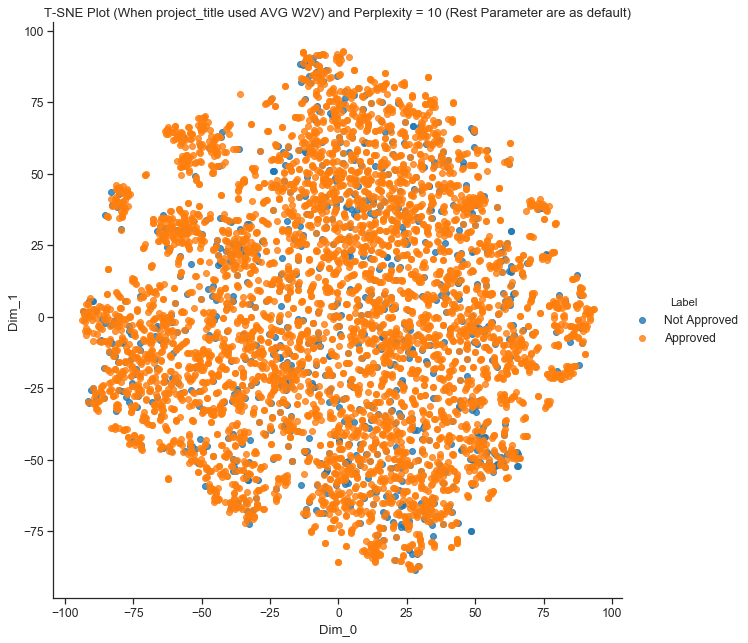

In [140]:
# Plot T-SNE: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x = 'Dim_0', y = 'Dim_1', data = df_plot, fit_reg=False, legend=True, size=9, hue='Label')
plt.title('T-SNE Plot (When project_title used AVG W2V) and Perplexity = 10 (Rest Parameter are as default)')

In [141]:
X_embedded = TSNE(n_components=2, perplexity= 10, learning_rate=750).fit_transform(X_s)
X_embedded.shape

(6000, 2)

In [142]:
df_plot = pd.DataFrame(data=X_embedded, columns=['Dim_0','Dim_1'])
df_plot.head()

Dim_0       Dim_1
0  68.245911  -36.790573
1 -44.206573   60.677536
2 -14.259713  100.377907
3  11.500110  -72.251472
4 -30.099688  -67.343964

In [143]:
df_plot['Label'] = Y_s
df_plot['Label'] = df_plot['Label'].replace({0: 'Not Approved', 1: 'Approved'})
df_plot.head()

Dim_0       Dim_1         Label
0  68.245911  -36.790573  Not Approved
1 -44.206573   60.677536      Approved
2 -14.259713  100.377907  Not Approved
3  11.500110  -72.251472      Approved
4 -30.099688  -67.343964      Approved

Text(0.5, 1.0, 'T-SNE Plot (When project_title used AVG W2V) and Perplexity = 10 and Learning Rate = 750 (Rest Parameter are as default)')

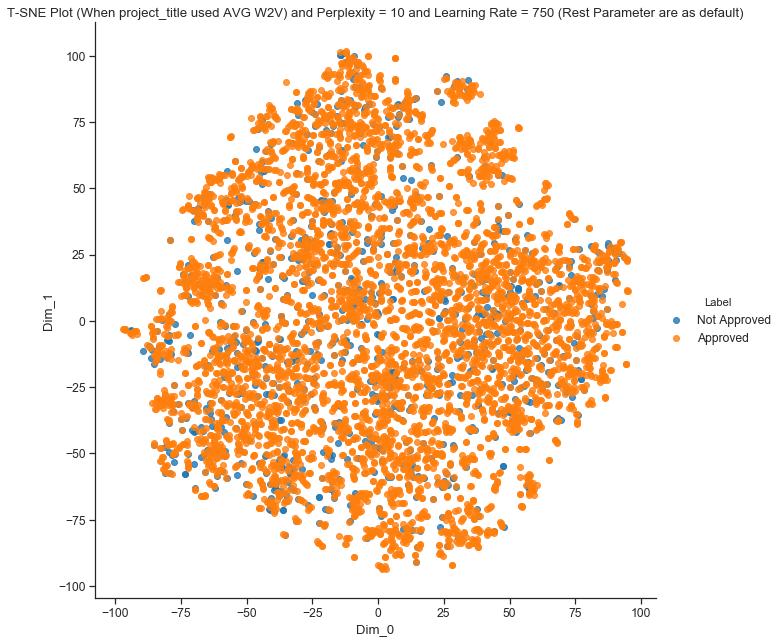

In [144]:
# Plot T-SNE: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x = 'Dim_0', y = 'Dim_1', data = df_plot, fit_reg=False, legend=True, size=9, hue='Label')
plt.title('T-SNE Plot (When project_title used AVG W2V) and Perplexity = 10 and Learning Rate = 750 (Rest Parameter are as default)')

## Observation
From the above plot even after changing perplexity and learning rate to get different distinguish plot. However, we observed that it has gotten even worsen than the other two above (BoW and TFIDF features)

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [145]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
X = hstack((categories_one_hot, sub_categories_one_hot, project_grade_category_one_hot, \
            tfidf_w2v_title, \
            price_normalized, teacher_number_of_previously_posted_projects_normalized, quantity_normalized))
X.shape

(109248, 346)

In [146]:
# To convert sparse to dense array
X = X.toarray()
X.shape

(109248, 346)

In [147]:
# Taking 6k data points only
X_s = X[:6000]
X_s.shape

(6000, 346)

In [148]:
# Applying TSNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
X_embedded = TSNE(n_components=2).fit_transform(X_s)
X_embedded.shape

(6000, 2)

In [149]:
df_plot = pd.DataFrame(data=X_embedded, columns=['Dim_0','Dim_1'])
df_plot.head()

Dim_0      Dim_1
0 -41.374023   9.146647
1  43.807129 -21.236679
2  53.446846 -43.219006
3 -70.965126   9.081133
4   2.945698  51.389301

In [150]:
df_plot['Label'] = Y_s
df_plot['Label'] = df_plot['Label'].replace({0: 'Not Approved', 1: 'Approved'})
df_plot.head()

Dim_0      Dim_1         Label
0 -41.374023   9.146647  Not Approved
1  43.807129 -21.236679      Approved
2  53.446846 -43.219006  Not Approved
3 -70.965126   9.081133      Approved
4   2.945698  51.389301      Approved

Text(0.5, 1.0, 'T-SNE Plot (When project_title used TFIDF W2V) and Perplexity = 30 (Rest Parameter are as default)')

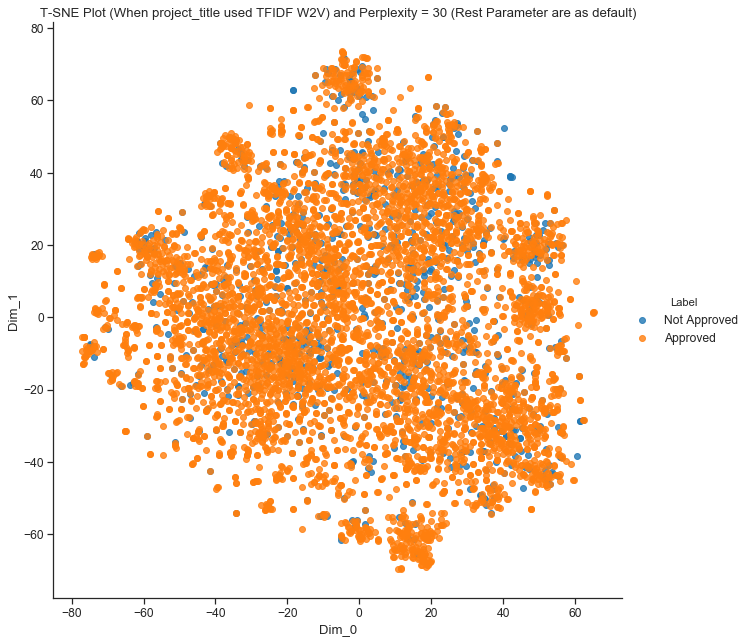

In [151]:
# Plot T-SNE: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x = 'Dim_0', y = 'Dim_1', data = df_plot, fit_reg=False, legend=True, size=9, hue='Label')
plt.title('T-SNE Plot (When project_title used TFIDF W2V) and Perplexity = 30 (Rest Parameter are as default)')

In [152]:
X_embedded = TSNE(n_components=2, perplexity= 10).fit_transform(X_s)
X_embedded.shape

(6000, 2)

In [153]:
df_plot = pd.DataFrame(data=X_embedded, columns=['Dim_0','Dim_1'])
df_plot.head()

Dim_0      Dim_1
0  50.144363 -57.056713
1 -64.433037 -19.428961
2 -75.449860  28.891426
3  54.545826   5.443674
4  56.801991  33.888901

In [154]:
df_plot['Label'] = Y_s
df_plot['Label'] = df_plot['Label'].replace({0: 'Not Approved', 1: 'Approved'})
df_plot.head()

Dim_0      Dim_1         Label
0  50.144363 -57.056713  Not Approved
1 -64.433037 -19.428961      Approved
2 -75.449860  28.891426  Not Approved
3  54.545826   5.443674      Approved
4  56.801991  33.888901      Approved

Text(0.5, 1.0, 'T-SNE Plot (When project_title used TFIDF W2V) and Perplexity = 10 (Rest Parameter are as default)')

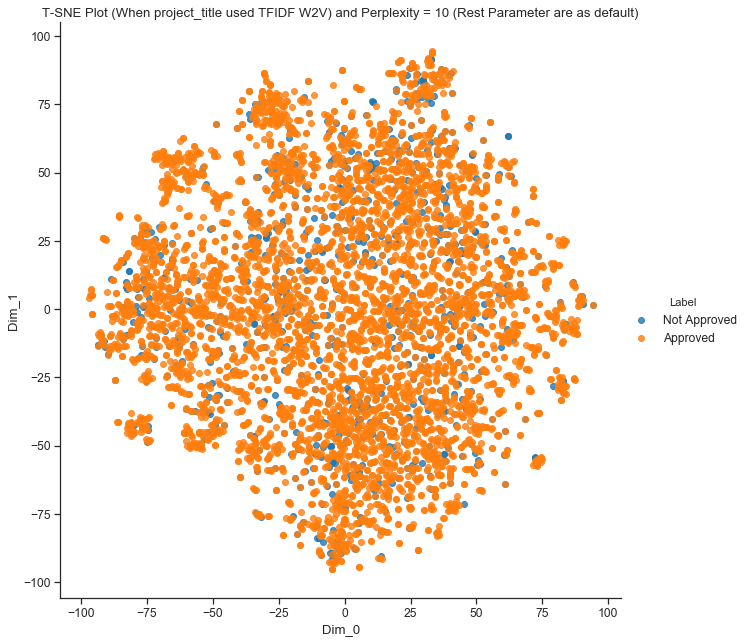

In [155]:
# Plot T-SNE: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x = 'Dim_0', y = 'Dim_1', data = df_plot, fit_reg=False, legend=True, size=9, hue='Label')
plt.title('T-SNE Plot (When project_title used TFIDF W2V) and Perplexity = 10 (Rest Parameter are as default)')

In [156]:
X_embedded = TSNE(n_components=2, perplexity= 10, learning_rate=750).fit_transform(X_s)
X_embedded.shape

(6000, 2)

In [157]:
df_plot = pd.DataFrame(data=X_embedded, columns=['Dim_0','Dim_1'])
df_plot.head()

Dim_0      Dim_1
0  68.828461 -31.453283
1 -72.384598  21.288073
2 -53.838390  82.955421
3 -11.016937 -68.138939
4  -9.308908 -59.672318

In [158]:
df_plot['Label'] = Y_s
df_plot['Label'] = df_plot['Label'].replace({0: 'Not Approved', 1: 'Approved'})
df_plot.head()

Dim_0      Dim_1         Label
0  68.828461 -31.453283  Not Approved
1 -72.384598  21.288073      Approved
2 -53.838390  82.955421  Not Approved
3 -11.016937 -68.138939      Approved
4  -9.308908 -59.672318      Approved

Text(0.5, 1.0, 'T-SNE Plot (When project_title used TFIDF W2V) and Perplexity = 10 and Learning Rate = 750 (Rest Parameter are as default)')

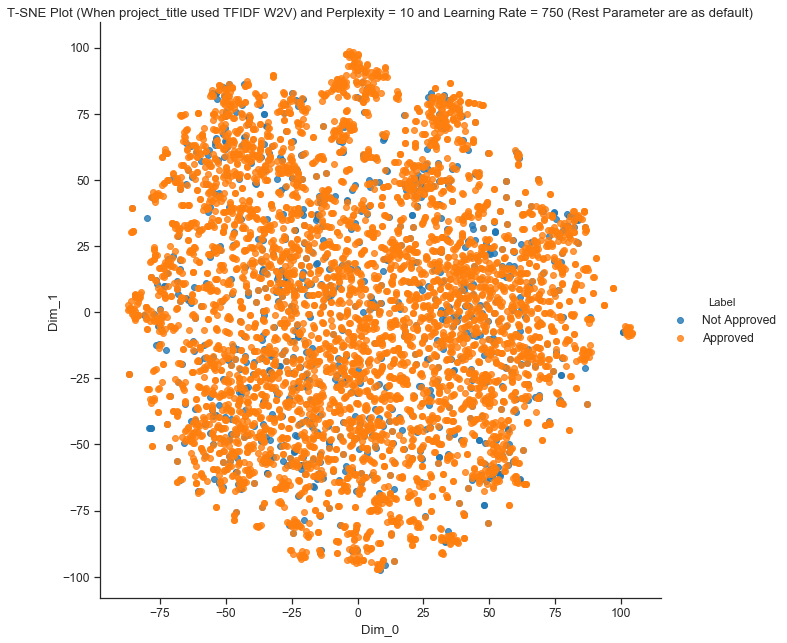

In [159]:
# Plot T-SNE: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x = 'Dim_0', y = 'Dim_1', data = df_plot, fit_reg=False, legend=True, size=9, hue='Label')
plt.title('T-SNE Plot (When project_title used TFIDF W2V) and Perplexity = 10 and Learning Rate = 750 (Rest Parameter are as default)')

## Observation
From the above plot, there still not get any cluster of different class belonging. So this is not going to be helpful information for further process

<h2> 2.5 Conclusions </h2>

### Write few sentences about the results that you obtained and the observations you made.


1. Number of approved project and not approved project of all data points are 85% and 15%
2. From the state_code analysis, we observed that CA state_code had done more projects above (15K) and had been approved about 85%. VT state_code had done only 80 projects and out of these, 64 projects had been approved (80%)
3. From the teacher_prefix analysis, Teacher with prefix (Mrs and Ms) had done more around around in the 10K number of project than the other with less than 10K projects.
4. From the project_grade_category analysis, These all project_grade_category had equivalent(more or less) project's approved 83% (+- 2%)and also done above 10K projects on every grades.
5. From the project_subject_categories analysis, We found that Literacy_language and Math_Science categories are trending fields that people are focus the most projects
6. From the project_subject_subcategory, As we already seen Literacy_language and Math_Science categories have the most trending field where people are most considerate on this field to make project. Literacy is the sub-category of Literacty_language and Mathematics is the sub-category of Math_Science which have most trending as we observed from previous point (which has to be expected)
7. From the project_title analysis, We observed that for the project title which around 4 words tends to have more density however, we cannot find the differentation of project's approval (Approved and not approved projects).
8. From the essay, We observed that most of the essay which have 200 words have more density than the others for both approved and not approved project and approved project have more at the peak and not approved project have more for 200 words later.
9. From the cost_per_project analysis, we observed from the percentitle table (percentile of 5 interval ) that, rejected projects had spent more expense than the approved one.
10. From the teacher_number_of_previously_posted_project analysis, if we observe 90th and 95th percentile, it showing more gaps about 20-30 projects but from that 95th to 100th percentile, there is huge variation gap between them (300-400).
11. From the proejct_resource_summary analysis, All list of text, which is approved project only, has got 9% that contain numeric value. and for all list of text, which is not approved project only, has got 15% that contain numeric value. We can say that there is no relation between numeric text to project approval which we can further process
12. We performed text preprocessing on essay, project_tile, project_resource_summary like decontract, remove special character, converting to lowercase and removal of stopwords and keeping the clean ones.
13. We performed Feature extraction on essay, project_tile, project_resource_summary the text to vector are Bag of Words (BoW), TF-IDF , Average w2v and TF-IDF w2V. And words are taken from pretained from glove vector.
14. Converting the numeric features into range value (-1,1) by Standization to neglecence the units.
15. Converting the catorgical attibutes into oneHot encode for further processing.
16. Applying t-SNE by taking attributes are project_subject_categories, project_subject_subcategory, project_grade_category, project_tile (taking different feature extraction on this attributes only), price, teacher_number_of_previously_posted_project and quantity. We conclude that we didnt get any information even applying this techniques. So, we need to think other powerful technique which can be ddifferentiated from each other classes